In [ ]:
print('hello')

hello


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:

# Load the data
df = pd.read_csv('/content/RELIANCE.NS.csv')


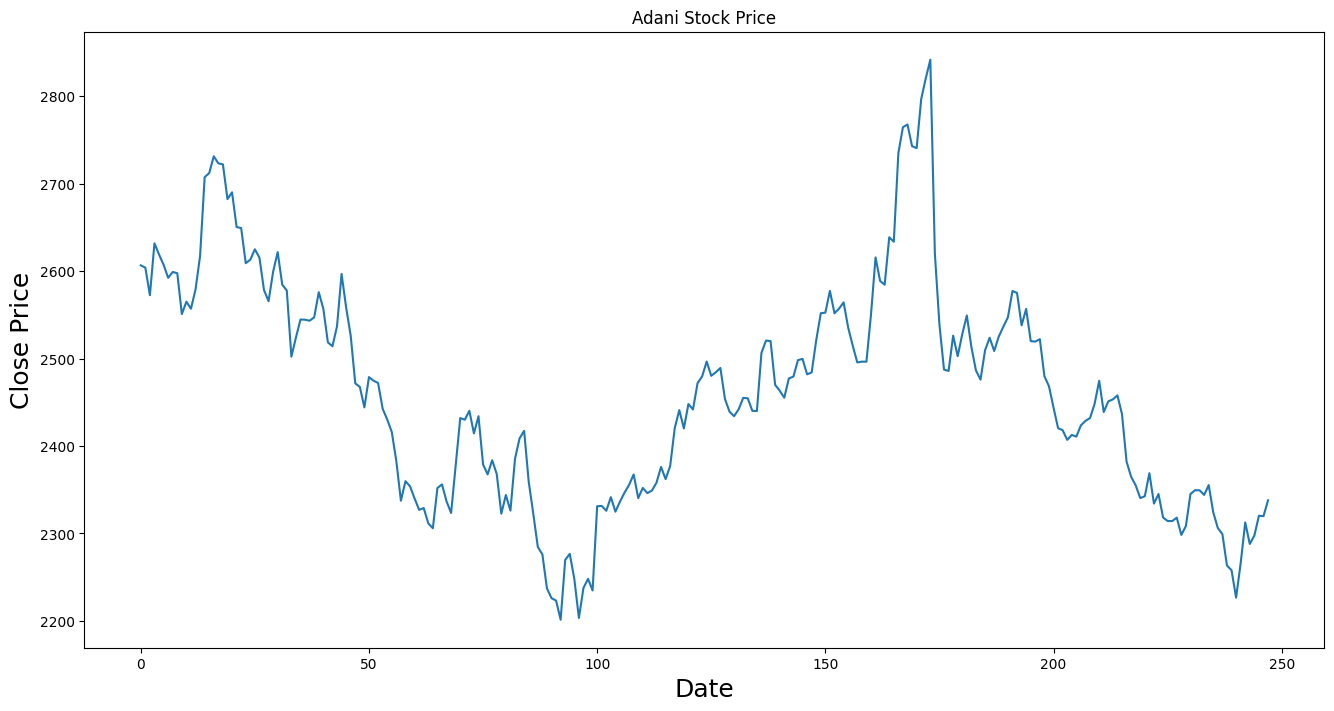

In [ ]:
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Adani Stock Price')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()


In [ ]:
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]['Close'].values.reshape(-1, 1)
test_data = df.iloc[train_size:]['Close'].values.reshape(-1, 1)

In [ ]:
# Normalize the data
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)
train_data_gen = TimeseriesGenerator(train_data, train_data, length=10, batch_size=1)

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(10, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_data_gen, epochs=10)

Epoch 1/10
188/188 [==============================] - 11s 17ms/step - loss: 0.0315
Epoch 2/10
188/188 [==============================] - 4s 19ms/step - loss: 0.0269
Epoch 3/10
188/188 [==============================] - 3s 18ms/step - loss: 0.0254
Epoch 4/10
188/188 [==============================] - 3s 18ms/step - loss: 0.0212
Epoch 5/10
188/188 [==============================] - 4s 20ms/step - loss: 0.0209
Epoch 6/10
188/188 [==============================] - 4s 23ms/step - loss: 0.0188
Epoch 7/10
188/188 [==============================] - 4s 19ms/step - loss: 0.0163
Epoch 8/10
188/188 [==============================] - 4s 22ms/step - loss: 0.0148
Epoch 9/10
188/188 [==============================] - 3s 17ms/step - loss: 0.0160
Epoch 10/10
188/188 [==============================] - 4s 23ms/step - loss: 0.0113


In [ ]:
# Predict the stock price
test_data_gen = TimeseriesGenerator(test_data, test_data, length=10, batch_size=1)
predictions = model.predict(test_data_gen)

# Inverse transform the data
predictions = scaler.inverse_transform(predictions)

40/40 [==============================] - 2s 5ms/step


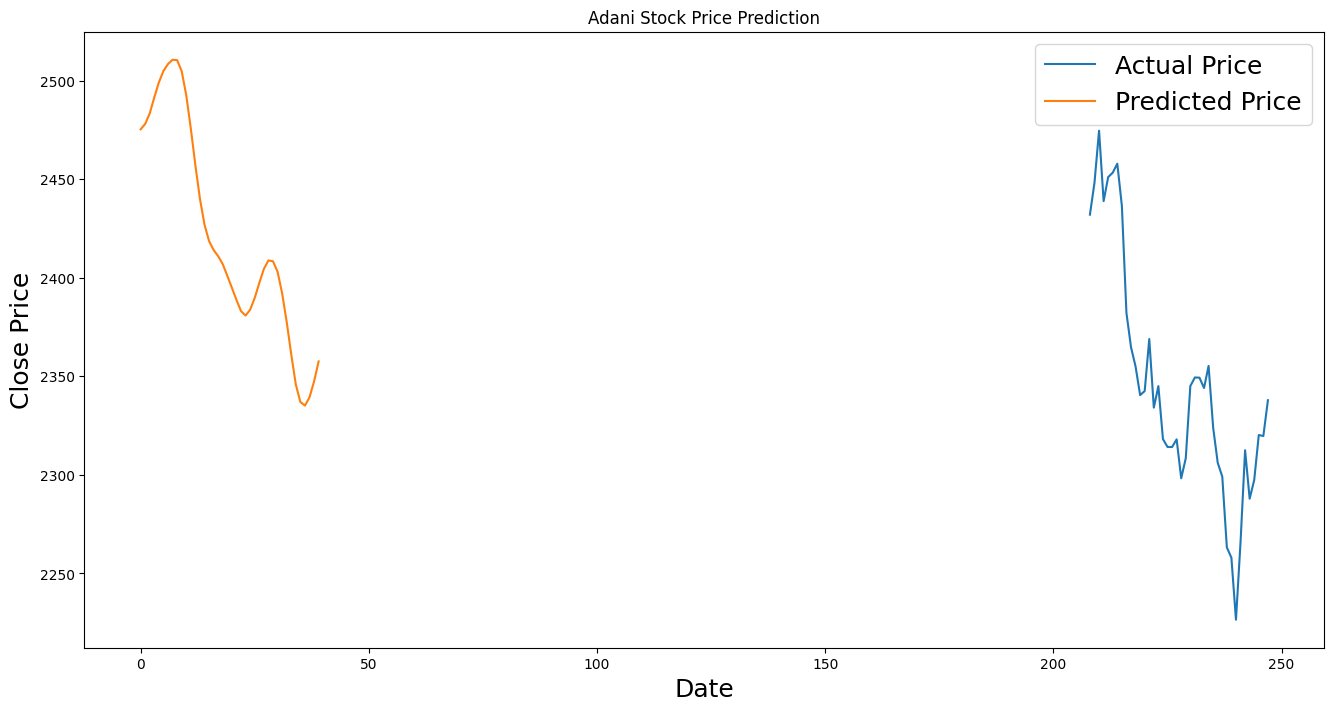

In [ ]:
# Plot the predicted stock price
plt.figure(figsize=(16,8))
plt.title('Adani Stock Price Prediction')
plt.plot(df.iloc[train_size+10:]['Close'], label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend(fontsize=18)
plt.show()